In [1]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = fetch_california_housing()

df

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [2]:
dataset=pd.DataFrame(df.data)
dataset

,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [3]:
dataset.columns=df.feature_names
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [4]:
#Independent feature and dependent feature
X=dataset
y=df.target

In [5]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [6]:
X_train.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
7061,4.1312,35.0,5.882353,0.975490,1218.0,2.985294,33.93,-118.02
14689,2.8631,20.0,4.401210,1.076613,999.0,2.014113,32.79,-117.09
17323,4.2026,24.0,5.617544,0.989474,731.0,2.564912,34.59,-120.14
10056,3.1094,14.0,5.869565,1.094203,302.0,2.188406,39.26,-121.00
15750,3.3068,52.0,4.801205,1.066265,1526.0,2.298193,37.77,-122.45


In [7]:
y_train

array([1.938, 1.697, 2.598, ..., 2.221, 2.835, 3.25 ])

In [8]:
#standardizing the dataset -Step 1
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()



In [9]:
X_train=scaler.fit_transform(X_train)


In [10]:
#for inverse transform--
#scaler.inverse_transform(X_train)

# Ridge Regression Algorithim

Ridge regression mainly used for removed  overfitting problem.In linear regression  we show the best fit line there are not more hyperparemeter so don't need hyperparemeter tuning


In Ridge regeression we do hyperparemeter tuning  of lamda that termed in sk learn is alpha .If alpha value is 0 then it is linear regression and if 1 then it is ridge regreesion but alpha value not less then 0

In [11]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [12]:
ridge_regressor=Ridge()

By default the Ridge paremeter alpha value is 0, For the problem statements which alpha value is sutiable ,so we make a paremeter variable

In [19]:
Parameters={'alpha':[1,2,5,10,20,30,40,50,60,70,80,90]}
ridgecv=GridSearchCV(ridge_regressor,Parameters,scoring='neg_mean_squared_error',cv=5)
ridgecv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80,
                                   90]},
             scoring='neg_mean_squared_error')

In [20]:
#the above equation help to find best paremeter
ridgecv.best_params_

{'alpha': 5}

In [22]:
print(ridgecv.best_score_)#tell the best MSE or #mean accuracy after  folding cv

-0.5268179966861514


After hyperparemeter tuning the output is slightly better than the linear reg  MSE value ...beacuse ridgecv-MSE value is big than MSE value of liner reg

In [28]:
ridge_pred=ridgecv.predict(X_test)
ridge_pred

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


array([75.26401486, 77.53555861, 81.80297869, ..., 74.44313433,
       71.79668243, 74.78380712])

Text(0.5, 1.0, 'Actual vs Predicted')

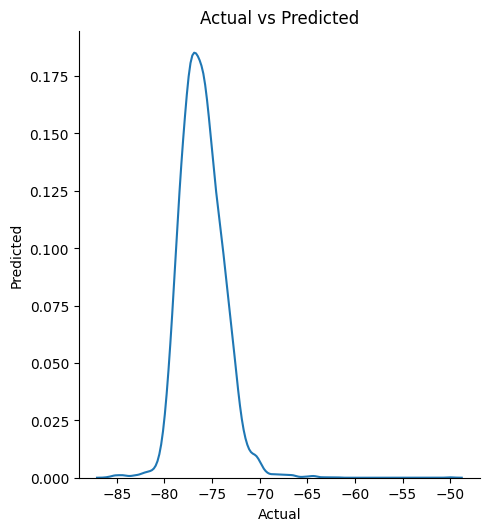

In [29]:
sns.displot(y_test-ridge_pred,kind='kde')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")

🔍 Observation:


The plot shows a density curve, which looks like a bell shape.

The x-axis is labeled Actual, and the y-axis is labeled Predicted (though this is a bit misleading—this is actually the density, not the prediction value itself).

The peak of the curve is sharp and centered around -76, which means that most of the predictions are close to the actual values in that range.

The distribution is narrow, indicating low spread or low error between actual and predicted values.

Since it’s not centered around zero error, you can’t say for sure if predictions are close to actual values.

✅ Conclusion:


This sharp and narrow curve suggests the model is performing well.

The predictions are closely aligned with the actual values (low bias and variance).

There are few extreme errors or outliers.

SO after the Ridge regression the model is near to Low bias Low variance  and it is near to Generalize model

In [30]:
from sklearn.metrics import r2_score
score=r2_score(y_test,ridge_pred)
score

-4410.705978563435

# LASSO Regression


In [31]:
from sklearn.linear_model import Lasso# use for overfitting and feature selection

In [32]:
lasso=Lasso()

In [35]:
Parameters={'alpha':[1,2,5,10,20,30,40,50,60,70,80,90]}
lassocv=GridSearchCV(lasso,Parameters,scoring='neg_mean_squared_error',cv=5)
lassocv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80,
                                   90]},
             scoring='neg_mean_squared_error')

In [36]:
print(lassocv.best_params_)
print(lassocv.best_score_)

{'alpha': 1}
-1.3400019579636542


In [37]:
lasso_pred=ridgecv.predict(X_test)
lasso_pred

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


array([2.06923961, 2.06923961, 2.06923961, ..., 2.06923961, 2.06923961,
       2.06923961])

Text(0.5, 1.0, 'Actual vs Predicted')

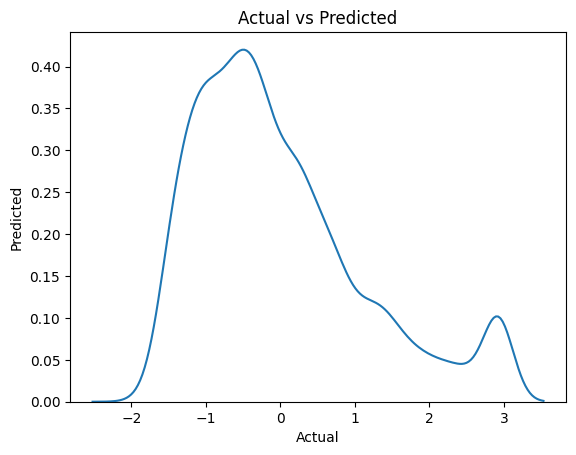

In [39]:
sns.kdeplot(y_test-lasso_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")

In [40]:
from sklearn.metrics import r2_score
score=r2_score(y_test,lasso_pred)
score

-3.930972139576383e-06

📌 Observation (Simple):
The model is not predicting well.
The R² score is almost 0, which means the model is no better than guessing the average.
In fact, the small negative R² means it’s doing slightly worse than that.